In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [6]:
pd_loan = pd.read_csv("/content/pd_data_initial_preprocessing.csv")\
            .drop('emp_title',axis=1)
pd_loan.shape


(85100, 50)

In [7]:
pd_loan = pd_loan[:-2]

In [8]:
print(pd_loan.shape, pd_loan.drop_duplicates().shape)
#no hay duplicados por el PREprocesamiento 
#vemos las filas y columnas

(85098, 50) (85098, 50)


### tipos de variables

In [9]:
pd_loan.dtypes.to_dict()
# tipos de variables


{'addr_state': dtype('O'),
 'all_util': dtype('float64'),
 'annual_inc': dtype('float64'),
 'application_type': dtype('O'),
 'dti': dtype('float64'),
 'earliest_cr_line_month': dtype('float64'),
 'earliest_cr_line_year': dtype('float64'),
 'emp_length': dtype('float64'),
 'fico_range_high': dtype('float64'),
 'fico_range_low': dtype('float64'),
 'grade': dtype('O'),
 'home_ownership': dtype('O'),
 'id': dtype('int64'),
 'il_util': dtype('float64'),
 'initial_list_status': dtype('O'),
 'inq_fi': dtype('float64'),
 'inq_last_12m': dtype('float64'),
 'installment': dtype('float64'),
 'int_rate': dtype('float64'),
 'loan_amnt': dtype('float64'),
 'loan_status': dtype('O'),
 'max_bal_bc': dtype('float64'),
 'mo_sin_old_il_acct': dtype('float64'),
 'mo_sin_old_rev_tl_op': dtype('float64'),
 'mort_acc': dtype('float64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_major_derog': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'mths_since_rcnt_il': dtype('floa

vamos a analizar la a variable objetivo y su tratamiento
## que es Loan status

## distribución de los valores

In [10]:
pd_plot_loan_status = pd_loan['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_loan_status_conteo = pd_loan['loan_status'].value_counts().reset_index()
pd_plot_loan_status_pc = pd.merge(pd_plot_loan_status, pd_plot_loan_status_conteo, on=['index'], how='inner')
pd_plot_loan_status_pc

,index,percent,loan_status
0,Current,88.134856,75001
1,Fully Paid,8.121225,6911
2,Late (31-120 days),1.718019,1462
3,In Grace Period,0.816705,695
4,Charged Off,0.723871,616
5,Late (16-30 days),0.484148,412
6,Default,0.001175,1


In [11]:
pd_loan.shape

(85098, 50)

### elimino prestamos no  finalizados


In [12]:
pd_loan.shape

(85098, 50)

In [13]:
pd_loan = pd_loan[((pd_loan['loan_status']=='Fully Paid') | 
                  (pd_loan['loan_status']=='Charged Off'))]

#pd_plot_loan_status = pd_loan['loan_status']\
       # .value_counts(normalize=True)\
        #.mul(100).rename('percent').reset_index()

#pd_plot_loan_status_conteo = pd_loan['loan_status'].value_counts().reset_index()
#pd_plot_loan_status_pc = pd.merge(pd_plot_loan_status, 
                                  #pd_plot_loan_status_conteo, on=['index'], how='inner')
#pd_plot_loan_status_pc
#fig = px.histogram(pd_plot_loan_status_pc, x="index", y=['percent'])
#fig.show()

### cantidad de valores nulos

In [14]:
pd_series_null_columns = pd_loan.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = pd_loan.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = pd_loan['loan_status'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/pd_loan.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/pd_loan.shape[1]


(50,) (7527,)


In [15]:
pd_loan.shape

(7527, 50)

In [16]:
pd_null_columnas


,nulos_columnas,porcentaje_columnas
mths_since_last_record,5936,0.788628
mths_since_recent_bc_dlq,5753,0.764315
mths_since_last_major_derog,5479,0.727913
mths_since_recent_revol_delinq,4943,0.656703
mths_since_last_delinq,3694,0.490767
il_util,1021,0.135645
emp_length,474,0.062973
mo_sin_old_il_acct,175,0.023250
mths_since_rcnt_il,175,0.023250
dti,6,0.000797


In [17]:
def dame_variables_categoricas(dataset=None):
    
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    lista_variables_categoricas = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=float) & (dataset[i].dtype!=int):
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 100:
                lista_variables_categoricas.append(i)
            else:
                other.append(i)

    return lista_variables_categoricas, other

    

In [18]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0




In [19]:
def get_deviation_of_mean_perc(pd_loan, list_var_continuous, target, multiplier):
    """
    Devuelve el porcentaje de valores que exceden del intervalo de confianza
    :type series:
    :param multiplier:
    :return:
    """
    pd_final = pd.DataFrame()
    
    for i in list_var_continuous:
        
        series_mean = pd_loan[i].mean()
        series_std = pd_loan[i].std()
        std_amp = multiplier * series_std
        left = series_mean - std_amp
        right = series_mean + std_amp
        size_s = pd_loan[i].size
        
        perc_goods = pd_loan[i][(pd_loan[i] >= left) & (pd_loan[i] <= right)].size/size_s
        perc_excess = pd_loan[i][(pd_loan[i] < left) | (pd_loan[i] > right)].size/size_s
        
        if perc_excess>0:    
            pd_concat_percent = pd.DataFrame(pd_loan[target][(pd_loan[i] < left) | (pd_loan[i] > right)]\
                                            .value_counts(normalize=True).reset_index()).T
            pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], 
                                         pd_concat_percent.iloc[0,1]]
            pd_concat_percent = pd_concat_percent.drop('index',axis=0)
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_outlier_values'] = pd_loan[i][(pd_loan[i] < left) | (pd_loan[i] > right)].size
            pd_concat_percent['porcentaje_sum_null_values'] = perc_excess
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores nulos')
        
    return pd_final

In [20]:
def get_percent_null_values_target(pd_loan, list_var_continuous, target):

    pd_final = pd.DataFrame()
    for i in list_var_continuous:
        if pd_loan[i].isnull().sum()>0:
            pd_concat_percent = pd.DataFrame(pd_loan[target][pd_loan[i].isnull()]\
                                            .value_counts(normalize=True).reset_index()).T
            pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], 
                                         pd_concat_percent.iloc[0,1]]
            pd_concat_percent = pd_concat_percent.drop('index',axis=0)
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_null_values'] = pd_loan[i].isnull().sum()
            pd_concat_percent['porcentaje_sum_null_values'] = pd_loan[i].isnull().sum()/pd_loan.shape[0]
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores nulos')
        
    return pd_final

In [21]:
def cramers_v(confusion_matrix):
    """ 
    calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    
    confusion_matrix: tabla creada con pd.crosstab()
    
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [22]:
pd_loan.shape

(7527, 50)

In [23]:
pd_loan.columns

Index(['id', 'url', 'zip_code', 'mths_since_last_record', 'il_util',
       'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'all_util', 'inq_fi',
       'max_bal_bc', 'total_cu_tl', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'open_il_24m', 'inq_last_12m', 'mths_since_last_major_derog',
       'mths_since_recent_revol_delinq', 'mths_since_last_delinq',
       'emp_length', 'mo_sin_old_il_acct', 'revol_util', 'dti',
       'verification_status', 'annual_inc', 'home_ownership', 'sub_grade',
       'grade', 'term', 'int_rate', 'installment', 'loan_status', 'total_acc',
       'purpose', 'addr_state', 'fico_range_low', 'fico_range_high',
       'initial_list_status', 'application_type', 'pub_rec',
       'pub_rec_bankruptcies', 'loan_amnt', 'mort_acc', 'mo_sin_old_rev_tl_op',
       'open_acc', 'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [24]:
pd_loan.drop('id', inplace=True, axis=1)

In [25]:
list_var_cat, other = dame_variables_categoricas(dataset=pd_loan)
print(list_var_cat)
print(other)
pd_loan.drop(other, inplace=True, axis=1)
pd_loan[list_var_cat] = pd_loan[list_var_cat].astype("category")
list_var_continuous = list(pd_loan.select_dtypes('float').columns)
pd_loan[list_var_continuous] = pd_loan[list_var_continuous].astype(float)
pd_loan.dtypes

['verification_status', 'home_ownership', 'grade', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
['url', 'zip_code']


mths_since_last_record             float64
il_util                            float64
mths_since_recent_bc_dlq           float64
mths_since_rcnt_il                 float64
all_util                           float64
inq_fi                             float64
max_bal_bc                         float64
total_cu_tl                        float64
open_acc_6m                        float64
open_act_il                        float64
open_il_12m                        float64
total_bal_il                       float64
open_rv_12m                        float64
open_rv_24m                        float64
open_il_24m                        float64
inq_last_12m                       float64
mths_since_last_major_derog        float64
mths_since_recent_revol_delinq     float64
mths_since_last_delinq             float64
emp_length                         float64
mo_sin_old_il_acct                 float64
revol_util                         float64
dti                                float64
verificatio

In [26]:
list_var_continuous


['mths_since_last_record',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_rcnt_il',
 'all_util',
 'inq_fi',
 'max_bal_bc',
 'total_cu_tl',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'open_il_24m',
 'inq_last_12m',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq',
 'emp_length',
 'mo_sin_old_il_acct',
 'revol_util',
 'dti',
 'annual_inc',
 'sub_grade',
 'term',
 'int_rate',
 'installment',
 'total_acc',
 'fico_range_low',
 'fico_range_high',
 'pub_rec',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'mort_acc',
 'mo_sin_old_rev_tl_op',
 'open_acc',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

In [27]:
pd_loan

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
8,84.0,63.0,NaN,27.0,36.0,1.0,1581.0,6.0,1.0,1.0,...,w,Individual,1.0,1.0,11575.0,2.0,275.0,20.0,7.0,1994.0
10,NaN,51.0,NaN,21.0,74.0,0.0,2779.0,0.0,0.0,1.0,...,w,Individual,0.0,0.0,7200.0,0.0,172.0,4.0,1.0,2000.0
24,NaN,70.0,NaN,7.0,39.0,6.0,5965.0,8.0,1.0,4.0,...,w,Individual,0.0,0.0,7500.0,4.0,51.0,19.0,3.0,2013.0
42,55.0,95.0,NaN,9.0,32.0,0.0,3898.0,0.0,1.0,1.0,...,w,Individual,2.0,2.0,10000.0,0.0,54.0,15.0,8.0,2006.0
91,NaN,82.0,NaN,7.0,83.0,3.0,2700.0,0.0,1.0,2.0,...,w,Individual,0.0,0.0,14000.0,1.0,97.0,4.0,5.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85058,NaN,93.0,NaN,4.0,55.0,1.0,7827.0,0.0,2.0,1.0,...,w,Individual,0.0,0.0,19200.0,0.0,137.0,12.0,12.0,2003.0
85077,45.0,NaN,NaN,49.0,14.0,0.0,0.0,0.0,0.0,0.0,...,w,Individual,1.0,1.0,3000.0,0.0,223.0,10.0,9.0,1998.0
85078,NaN,75.0,NaN,11.0,29.0,0.0,3924.0,0.0,0.0,1.0,...,w,Individual,0.0,0.0,7700.0,0.0,83.0,9.0,5.0,2010.0
85086,35.0,73.0,42.0,72.0,71.0,0.0,2790.0,2.0,0.0,7.0,...,w,Individual,1.0,0.0,4800.0,2.0,253.0,10.0,3.0,1996.0


In [28]:
pd_loan.drop(pd_loan.tail(3).index,inplace=True)

### separamos en train y test

In [29]:
pd_loan

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
8,84.0,63.0,NaN,27.0,36.0,1.0,1581.0,6.0,1.0,1.0,...,w,Individual,1.0,1.0,11575.0,2.0,275.0,20.0,7.0,1994.0
10,NaN,51.0,NaN,21.0,74.0,0.0,2779.0,0.0,0.0,1.0,...,w,Individual,0.0,0.0,7200.0,0.0,172.0,4.0,1.0,2000.0
24,NaN,70.0,NaN,7.0,39.0,6.0,5965.0,8.0,1.0,4.0,...,w,Individual,0.0,0.0,7500.0,4.0,51.0,19.0,3.0,2013.0
42,55.0,95.0,NaN,9.0,32.0,0.0,3898.0,0.0,1.0,1.0,...,w,Individual,2.0,2.0,10000.0,0.0,54.0,15.0,8.0,2006.0
91,NaN,82.0,NaN,7.0,83.0,3.0,2700.0,0.0,1.0,2.0,...,w,Individual,0.0,0.0,14000.0,1.0,97.0,4.0,5.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85046,NaN,8.0,NaN,34.0,36.0,0.0,7551.0,1.0,1.0,3.0,...,f,Individual,0.0,0.0,40000.0,2.0,125.0,11.0,1.0,2003.0
85050,117.0,17.0,NaN,39.0,69.0,1.0,1924.0,1.0,0.0,1.0,...,w,Individual,1.0,1.0,12000.0,1.0,79.0,18.0,11.0,2008.0
85054,NaN,72.0,NaN,21.0,78.0,1.0,2568.0,1.0,0.0,2.0,...,w,Joint App,0.0,0.0,6000.0,2.0,80.0,11.0,8.0,2010.0
85058,NaN,93.0,NaN,4.0,55.0,1.0,7827.0,0.0,2.0,1.0,...,w,Individual,0.0,0.0,19200.0,0.0,137.0,12.0,12.0,2003.0


In [30]:
from sklearn.model_selection import train_test_split
X_pd_loan, X_pd_loan_test, y_pd_loan, y_pd_loan_test = train_test_split(pd_loan.drop('loan_status',axis=1), 
                                                                     pd_loan['loan_status'], 
                                                                     stratify=pd_loan['loan_status'], 
                                                                     test_size=0.2)
pd_loan_train = pd.concat([X_pd_loan, y_pd_loan],axis=1)
pd_loan_test = pd.concat([X_pd_loan_test, y_pd_loan_test],axis=1)

In [31]:
pd_loan_test.loan_status

69159    Fully Paid
76458    Fully Paid
43425    Fully Paid
11986    Fully Paid
24081    Fully Paid
            ...    
52970    Fully Paid
61909    Fully Paid
35354    Fully Paid
42828    Fully Paid
44070    Fully Paid
Name: loan_status, Length: 1505, dtype: category
Categories (2, object): ['Charged Off', 'Fully Paid']

In [32]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    

In [ ]:
for i in list(pd_loan_train.columns):
    if (pd_loan_train[i].dtype==float) & (i!='loan_status'):
        plot_feature(pd_loan_train, col_name=i, isContinuous=True, target='loan_status')
    elif  i!='loan_status':
        plot_feature(pd_loan_train, col_name=i, isContinuous=False, target='loan_status')

In [33]:
get_deviation_of_mean_perc(pd_loan_train, list_var_continuous, target='loan_status', multiplier=3)


,Fully Paid,Charged Off,variable,sum_outlier_values,porcentaje_sum_null_values
0,0.923077,0.076923,il_util,52,0.008639
1,0.920245,0.079755,mths_since_rcnt_il,163,0.027081
2,0.75,0.25,all_util,8,0.001329
3,0.863158,0.136842,inq_fi,95,0.015783
4,0.947368,0.052632,max_bal_bc,114,0.018940
5,0.921739,0.078261,total_cu_tl,115,0.019106
6,0.883929,0.116071,open_acc_6m,112,0.018608
7,0.918519,0.081481,open_act_il,135,0.022429
8,0.905882,0.094118,open_il_12m,85,0.014122
9,0.916667,0.083333,total_bal_il,108,0.017943


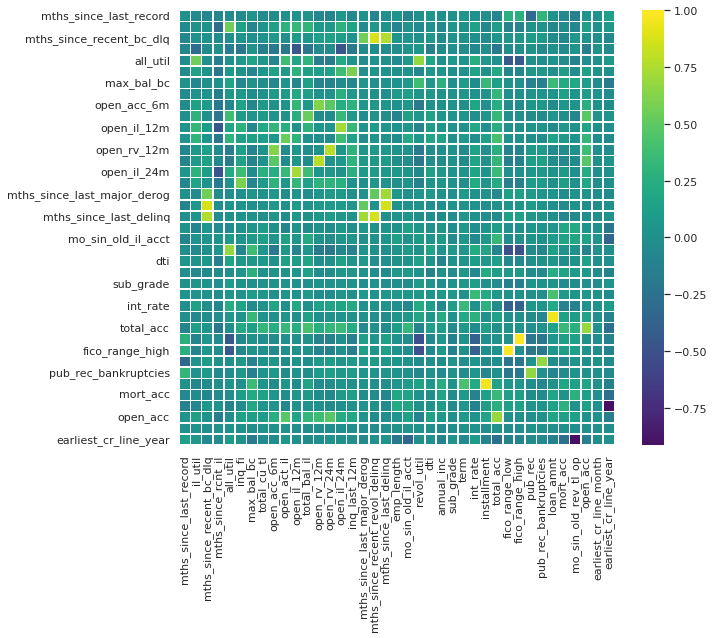

0

In [34]:
get_corr_matrix(dataset = pd_loan_train[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

### vemos la relaion de la correlacion con la varaible objetivo


In [35]:
get_percent_null_values_target(pd_loan_train, list_var_continuous, target='loan_status')


,Fully Paid,Charged Off,variable,sum_null_values,porcentaje_sum_null_values
0,0.918703,0.081297,mths_since_last_record,4748,0.788835
1,0.916359,0.083641,il_util,813,0.135072
2,0.91683,0.08317,mths_since_recent_bc_dlq,4581,0.761090
3,0.870504,0.129496,mths_since_rcnt_il,139,0.023094
4,1.0,0.0,all_util,1,0.000166
5,0.91934,0.08066,mths_since_last_major_derog,4364,0.725037
6,0.917069,0.082931,mths_since_recent_revol_delinq,3931,0.653099
7,0.917098,0.082902,mths_since_last_delinq,2895,0.480977
8,0.868984,0.131016,emp_length,374,0.062137
9,0.870504,0.129496,mo_sin_old_il_acct,139,0.023094


### he optado por rellenar en las  variables continuas con  la media o mediana, un valor "muy distinto al resto de cantidades, que refleje que de algún modo que es un valor missing" tal y como explicas en el enunciado

 no heutlizado la variable "revol util" por ser la  Tasa de utilización de la línea rotatoria, o la cantidad de crédito que el prestatario está utilizando en relación con todo el crédito rotatorio disponible, debido a la falta de contexto
 y por ende a su baja interpretación.

In [36]:
list_vars = list(set(list_var_continuous)-set(['revol_util']))
pd_loan_train[list_vars] = pd_loan_train[list_vars].fillna(pd_loan_train[list_vars].mean())
#pd_loan_train[list_vars] = pd_loan_train[list_vars].fillna(-99)
pd_loan_test[list_vars] = pd_loan_test[list_vars].fillna(pd_loan_train[list_vars].mean())
#pd_loan_test[list_vars] = pd_loan_test[list_vars].fillna(-99)

en las categricas por una clase nueva q refñeja la nulidad

In [37]:
pd_loan_train[list_var_cat] = pd_loan_train[list_var_cat].astype("object").fillna("SIN VALOR").astype("category")
pd_loan_test[list_var_cat] = pd_loan_test[list_var_cat].astype("object").fillna("SIN VALOR").astype("category")
# he rellenado pd loan test con los valores de test, y no con los de train;  porque sino de da NA

In [38]:
pd_series_null_columns2 = pd_loan_train.isnull().sum().sort_values(ascending=False)
pd_series_null_rows2 = pd_loan_train.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns2.shape, pd_series_null_rows2.shape)

pd_null_columnas2 = pd.DataFrame(pd_series_null_columns2, columns=['nulos_columnas'])     
pd_null_filas2 = pd.DataFrame(pd_series_null_rows2, columns=['nulos_filas'])  

(47,) (6019,)


In [39]:
pd_null_columnas2

,nulos_columnas
revol_util,4
mths_since_last_record,0
annual_inc,0
sub_grade,0
grade,0
term,0
int_rate,0
installment,0
total_acc,0
purpose,0


In [40]:
pd_null_filas2

,nulos_filas
15313,1
60865,1
64030,1
35096,1
69466,0
...,...
62400,0
68825,0
51547,0
79952,0


## Regrsión logística

In [41]:
modelo = LogisticRegression(penalty='none')

In [42]:
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none')
modelo.fit(X = pd_loan_train.loc[:,list_vars], y = pd_loan_train.loan_status)
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(pd_loan.columns, modelo.coef_.flatten(), )))


Intercept: [-8.46334579e-07]
Coeficiente: [('mths_since_last_record', 0.003763899175574614), ('il_util', -0.0017526811686630795), ('mths_since_recent_bc_dlq', 0.0007974658691068885), ('mths_since_rcnt_il', -7.941005210727334e-05), ('all_util', -0.0025143159628093), ('inq_fi', -3.1418100808279235e-05), ('max_bal_bc', -8.244592207746806e-05), ('total_cu_tl', 6.444713444286068e-06), ('open_acc_6m', -0.00021824638451123983), ('open_act_il', 0.00046034748404150317), ('open_il_12m', 0.003239623629093139), ('total_bal_il', 1.860403283115683e-05), ('open_rv_12m', 4.5705941569182896e-05), ('open_rv_24m', -7.424946962021819e-05), ('open_il_24m', -0.00029174362374504494), ('inq_last_12m', -0.00012758955080376038), ('mths_since_last_major_derog', 2.0866630417012916e-06), ('mths_since_recent_revol_delinq', -3.4843127198562005e-05), ('mths_since_last_delinq', -0.0014493250017360048), ('emp_length', -0.0026382144845803384), ('mo_sin_old_il_acct', -0.0014633136785779256), ('revol_util', 0.000218573305

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [43]:
print("Accuracy de entrenamiento:", modelo.score(pd_loan_train.loc[:,list_vars], y = pd_loan_train.loan_status))


Accuracy de entrenamiento: 0.9180927064296395


 predecir nuevas observaciones.



In [47]:
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = modelo.predict_proba(pd_loan_test.loc[:,list_vars])
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(4)

,Charged Off,Fully Paid
0,0.040654,0.959346
1,0.082419,0.917581
2,0.027182,0.972818
3,0.020247,0.979753


In [48]:
print("Accuracy de test:", modelo.score(pd_loan_test.loc[:,list_vars], y = pd_loan_test.loan_status))

Accuracy de test: 0.9182724252491694


In [46]:
predicciones = modelo.predict(pd_loan_test.loc[:,list_vars])
predicciones


array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

##K-NN (1pt)

In [57]:
list_vars

['fico_range_low',
 'il_util',
 'mths_since_recent_revol_delinq',
 'open_rv_24m',
 'installment',
 'sub_grade',
 'earliest_cr_line_month',
 'annual_inc',
 'inq_last_12m',
 'mths_since_recent_bc_dlq',
 'mo_sin_old_il_acct',
 'open_act_il',
 'loan_amnt',
 'open_acc_6m',
 'dti',
 'mths_since_rcnt_il',
 'pub_rec_bankruptcies',
 'open_rv_12m',
 'earliest_cr_line_year',
 'all_util',
 'term',
 'total_cu_tl',
 'open_acc',
 'mort_acc',
 'int_rate',
 'emp_length',
 'total_acc',
 'open_il_24m',
 'pub_rec',
 'mths_since_last_delinq',
 'total_bal_il',
 'max_bal_bc',
 'open_il_12m',
 'mths_since_last_record',
 'mo_sin_old_rev_tl_op',
 'fico_range_high',
 'mths_since_last_major_derog',
 'inq_fi']

In [49]:
pd_loan_test["loan_status"] = pd_loan_test["loan_status"].astype("category")
pd_loan_train["loan_status"] = pd_loan_train["loan_status"].astype("category")

# convierto a categórica en lugar de string a loan status

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [58]:
knn_model.fit(pd_loan_train.loc[:,list_vars].values, pd_loan_train.loan_status)


KNeighborsRegressor(n_neighbors=3)

evaluar la precision

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(pd_loan_train.loc[:,list_vars])
mse = mean_squared_error(pd_loan_train.loan_status, train_preds)
rmse = sqrt(mse)
rmse

TypeError: ignored

In [ ]:
test_preds = knn_model.predict(pd_loan_test.loc[:,list_vars])
mse = mean_squared_error(pd_loan_test.loan_status, test_preds)
rmse = sqrt(mse)
rmse


## Random Forest


In [54]:
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [55]:
modelo2 = RandomForestRegressor()

In [61]:
modelo2.fit(X = pd_loan_train.loc[:,list_vars], y = pd_loan_train.loan_status)
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(pd_loan.columns, modelo.coef_.flatten(), )))

ValueError: ignored

## Bagging Classifier 


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification


In [ ]:
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(pd_loan_train.loc[:,list_vars], pd_loan_train.loan_status)

## Arbol simple de decision

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, pd_loan_train, pd_loan_train.loan_status, cv=10)

## GradientBoost

In [ ]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [ ]:
modelo3 = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )


In [ ]:
modelo3.fit(X = pd_loan_train.loc[:,list_vars], y = pd_loan_train.loan_status)

##6.-  ¿Cuál de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas. (0,5pt)


REgresión logistica 
luego el gradient booost
luego el bagging
y los dos arboles el simple y el random

## 7.-  En esta práctica no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo , los ensambladores nos pueden dar una buena pista, de que variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación (0,5pt)


En anteriores apartados, he realizado varias graficas ymatrizes, de correlación con la variable objetivo, de distribución para con la variable objetivo (hecha en las primeras lineas; y también una matriz o cógido sobre los NA y cuanto peson tenian estos para con la variable a estudiar. 

Concretamente en este grafico:


*for i in list(pd_loan_train.columns):
    if (pd_loan_train[i].dtype==float) & (i!='loan_status'):
        plot_feature(pd_loan_train, col_name=i, isContinuous=True, target='loan_status')
    elif  i!='loan_status':
        plot_feature(pd_loan_train, col_name=i, isContinuous=False, target='loan_status')*


### Aunque lo mas correcto es hacer un "Feature Selection"


In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(pd_loan_train, 0.8)
print('correlated features: ', len(set(corr_features)) )


correlated features:  3


In [ ]:
# debemos eliminar los elemntos correlacionados
pd_loan_train.drop(labels=corr_features, axis=1, inplace=True)
pd_loan_test.drop(labels=corr_features, axis=1, inplace=True)

pd_loan_train.shape, pd_loan_test.shape

((3054, 44), (764, 44))

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(pd_loan_train), pd_loan_train.loan_status)

In [ ]:
pd_loan_train.columns[list(sfs1.k_feature_idx_)]

Index(['mths_since_last_record', 'il_util', 'mths_since_recent_bc_dlq',
       'mths_since_rcnt_il', 'all_util', 'inq_fi', 'max_bal_bc', 'total_cu_tl',
       'open_acc_6m', 'open_act_il'],
      dtype='object')

Podemos ver que la selección de características hacia adelante da como resultado la selección de las columnas anteriores de entre todas las columnas dadas.

In [ ]:
sfs1.k_feature_idx_
pd_loan_train.columns[list(sfs1.k_feature_idx_)]


Index(['mths_since_last_record', 'il_util', 'mths_since_recent_bc_dlq',
       'mths_since_rcnt_il', 'all_util', 'inq_fi', 'max_bal_bc', 'total_cu_tl',
       'open_acc_6m', 'open_act_il'],
      dtype='object')

**Así, la eliminación de características hacia atrás da como resultado la selección de las siguientes columnas.**